In [6]:
import pandas as pd
import collections
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
import seaborn as sns
from sklearn import manifold, datasets

DIR =  "/Users/qybo123/PycharmProjects/Recom_sys/OOI/ooi_2019/"
FILE_IP = "ooi_ip_to_loc_all_2019.csv"
FILE_LOG = "ooi_all_full_kg_2019.csv"


### 对user social network自动绘制tSNE

In [1]:


df_log = pd.read_csv(DIR + FILE_LOG)
df_IP = pd.read_csv(DIR + FILE_IP)

city_dict = dict(df_IP.city.value_counts())
selected_city_user_dict = collections.defaultdict(list)

# 寻找合适的groups
for city, user_cnt in city_dict.items():
    userIP_list = list(df_IP[df_IP["city"] == city].userIP)
    df_selected = df_log[df_log["userIP"].isin(userIP_list)]
    
    if len(df_selected) >= 50:
        print(f"City: {city} {len(df_selected)}")
        selected_city_user_dict[city] = userIP_list
        
# Delete large city
# del selected_city_user_dict["Ashburn"]
# del selected_city_user_dict["Boardman"]
        

/Users/qybo123/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


City: Boardman 9864
City: Seattle 1613
City: Boydton 1239
City: Corvallis 2047
City: Ashburn 56773
City: Woods Hole 582
City: Chicago 53
City: College Station 238
City: Mountain View 3451
City: La Jolla 93
City: Newburyport 2314
City: East Falmouth 189
City: Tucson 108
City: Sagamore Beach 69
City: Cambridge 66
City: San Diego 50
City: Dorchester 167
City: Southampton 81
City: Eugene 62
City: San Jose 145
City: Vancouver 58
City: Brooklyn 563
City: Bellingham 149
City: Trenton 419
City: Paris 296
City: New Brunswick 293
City: Everett 90
City: Kent 88
City: Salt Lake City 3616
City: Gothenburg 186
City: Millersville 136
City: North Dartmouth 116
City: East Brunswick 68
City: Old Bridge 297
City: Rockville 79
City: Flourtown 189
City: El Cajon 81
City: Scottsdale 86
City: Haarlem 98
City: Point Pleasant Beach 166


In [209]:
selected_city_user_dict.keys()

dict_keys(['Seattle', 'Boydton', 'Corvallis', 'Woods Hole', 'Chicago', 'College Station', 'Mountain View', 'La Jolla', 'East Falmouth', 'Newburyport', 'Sagamore Beach', 'Tucson', 'Cambridge', 'San Diego', 'Dorchester', 'Southampton', 'Eugene', 'San Jose', 'Vancouver', 'Brooklyn', 'Bellingham', 'Paris', 'Everett', 'Trenton', 'New Brunswick', 'Gothenburg', 'Kent', 'Salt Lake City', 'North Dartmouth', 'Old Bridge', 'Millersville', 'East Brunswick', 'Rockville', 'Scottsdale', 'El Cajon', 'Point Pleasant Beach', 'Haarlem', 'Flourtown', 'covallis', 'Covallis'])

In [251]:
selected_city_user_dict["Salt Lake City"]

['64.62.252.162', '64.62.252.176', '64.62.252.174', '64.62.252.163']

##### Get a organization list

## Plot Rutgers users

user=8
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 716 samples in 0.003s...
[t-SNE] Computed neighbors for 716 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 716 / 716
[t-SNE] Mean sigma: 2.652880
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.979500
[t-SNE] KL divergence after 1000 iterations: 0.288248
t-SNE: 3.4 sec


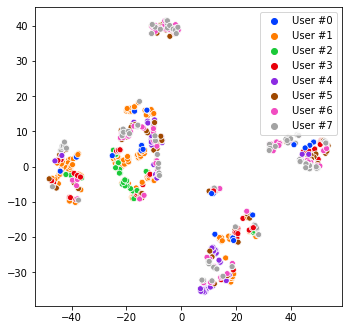

In [7]:
# 绘制单个城市的t-SNE

# print(f"Processing #{city_cnt}, {city} with {len(userIP_list)} users ....")
# city_cnt += 1

city = "New Brunswickn"
state = "New Jersey"
organization = "Rutgers University"

userIP_list = selected_city_user_dict[city]
userIP_list = userIP_list + selected_city_user_dict["Trenton"]
userIP_list = userIP_list + selected_city_user_dict["Old Bridge"]
# userIP_list = amazon_list
df_selected_user = df_log[df_log["userIP"].isin(userIP_list)]

df_selected_user = df_selected_user[["userIP", "array", "site", "node", "ins", "discipline"]].apply(lambda x: pd.factorize(x)[0]) # , "site", "node", "ins"
df_small_narray = df_selected_user[["userIP", "array", "site", "node", "ins", "discipline"]].to_numpy()

user_cnt = len(userIP_list)
print(f"user={user_cnt}")


fig = plt.figure(figsize=(5.5, 5.5))

# plt.title("%s, %s, %s, %i users, %i data points, t-SNE visualization" %(organization, city, state, user_cnt, len(df_selected_user)))

t0 = time()
tsne = manifold.TSNE(n_components=2, init='pca', verbose=1, method='barnes_hut', random_state=0, perplexity=30)
Y = tsne.fit_transform(df_small_narray)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))  # 算法用时

# plt.scatter(Y[:, 0], Y[:, 1])
userID_list = df_small_narray[:, 0]
# # Buit userID list - for rutgers
userID_str_list = []
Id2Name_dict = collections.defaultdict()

for x in userID_list:
    if str(x) not in Id2Name_dict:
        Id2Name_dict[str(x)] = "User #" + str(x)
    str_ID = Id2Name_dict[str(x)]
    userID_str_list.append(str_ID)


df_tsne = pd.DataFrame({'X_axis': Y[:, 0], "Y_axis": Y[:, 1], "userID": userID_list})

# sns.scatterplot(x="X_axis", y="Y_axis", data=df_tsne)
sns.scatterplot(x="X_axis", y="Y_axis", data=df_tsne, \
                hue=userID_str_list, \
                palette=sns.color_palette("bright", user_cnt),legend="full")

plt.ylabel("")
plt.xlabel("")
plt.legend(loc='upper right')
# frame1 = plt.gca()
# frame1.axes.get_xaxis().set_visible(False)
# frame1.axes.get_yaxis().set_visible(False) 
# frame1.axes.get_xaxis().set_ticks([])
# frame1.axes.get_yaxis().set_ticks([])
    
plt.show()
# plt.savefig(DIR_fig + "Rutgers_University_tSNE"+".png")